In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size' : 13})

In [2]:
textrank = pd.read_csv('../data/textrank.csv')
wordrank = pd.read_csv('../data/wordrank.csv')
hybrid64 = pd.read_csv('../data/hybrid64.csv')
hybrid80 = pd.read_csv('../data/hybrid80.csv')

In [5]:
textrank_mean = textrank.mean()
wordrank_mean = wordrank.mean()
hybrid64_mean = hybrid64.mean()
hybrid80_mean = hybrid80.mean()

textrank_sd = textrank.std()
wordrank_sd = wordrank.std()
hybrid64_sd = hybrid64.std()
hybrid80_sd = hybrid80.std()

In [25]:
means = pd.concat([textrank_mean, wordrank_mean, hybrid64_mean, hybrid80_mean], axis = 1)
means = means.rename(columns={0: 'TextRank', 1 : 'WordRank', 2 : 'Hybrid64', 3:'Hybrid80'})

sds = pd.concat([textrank_sd, wordrank_sd, hybrid64_sd, hybrid80_sd], axis = 1)
sds = sds.rename(columns={0: 'TextRank', 1 : 'WordRank', 2 : 'Hybrid64', 3:'Hybrid80'})

sds = sds*1.96/np.sqrt(textrank.shape[0])

In [26]:
means 

,TextRank,WordRank,Hybrid64,Hybrid80
ROUGE_1,59.066,62.441,58.761,58.450
ROUGE_2,22.194,22.128,20.480,20.644
ROUGE_3,9.695,9.349,7.904,8.163
BLEU_1,27.957,22.155,27.656,27.998
BLEU_2,10.618,7.980,10.044,10.302
BLEU_3,4.662,3.391,3.939,4.141
F1_1,37.827,32.578,37.487,37.780
F1_2,14.253,11.645,13.390,13.671
F1_3,6.233,4.929,5.214,5.452


In [27]:
sds

,TextRank,WordRank,Hybrid64,Hybrid80
ROUGE_1,4.902549,4.613719,4.314394,4.335734
ROUGE_2,4.894034,4.880567,4.439395,4.630924
ROUGE_3,4.195202,3.985657,3.735069,3.821113
BLEU_1,2.465171,2.668320,2.209755,2.339486
BLEU_2,1.576554,1.933350,1.552497,1.679785
BLEU_3,1.636794,1.529390,1.576269,1.624677
F1_1,2.985249,3.298888,2.597742,2.875204
F1_2,2.352978,2.698020,2.248329,2.435126
F1_3,2.321967,2.182627,2.182677,2.245886


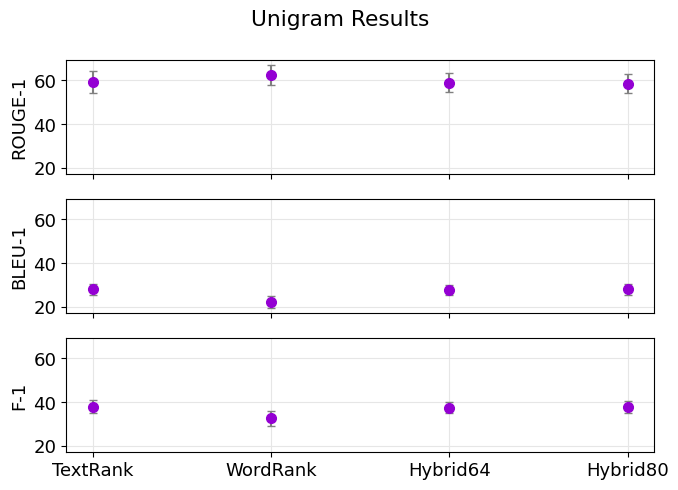

In [54]:
fig, axs = plt.subplots(3, sharex = True, figsize = (7, 5), sharey = True)

axs[0].errorbar(means.columns, means.iloc[0, :], sds.iloc[0, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 7, color = 'darkviolet');
axs[0].set(ylabel = 'ROUGE-1')

axs[1].errorbar(means.columns, means.iloc[3, :], sds.iloc[3, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 7, color = 'darkviolet');
axs[1].set(ylabel = 'BLEU-1')

axs[2].errorbar(means.columns, means.iloc[6, :], sds.iloc[6, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 7, color = 'darkviolet');
axs[2].set(ylabel = 'F-1')

for ax in axs:
    ax.grid(axis = 'x', color = '0.9')
    ax.grid(axis = 'y', color = '0.9')

fig.suptitle('Unigram Results')
fig.tight_layout()
fig.subplots_adjust(top = 0.88)

plt.show()

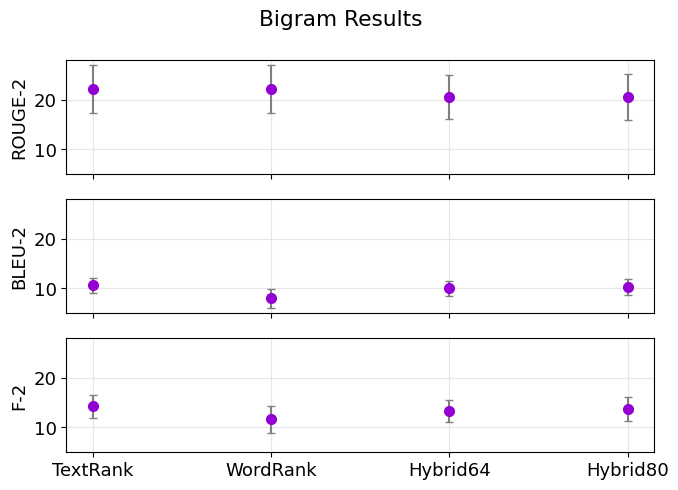

In [59]:
fig, axs = plt.subplots(3, sharex = True, figsize = (7, 5), sharey = True)

axs[0].errorbar(means.columns, means.iloc[1, :], sds.iloc[1, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 7, color = 'darkviolet');
axs[0].set(ylabel = 'ROUGE-2')

axs[1].errorbar(means.columns, means.iloc[4, :], sds.iloc[4, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 7, color = 'darkviolet');
axs[1].set(ylabel = 'BLEU-2')

axs[2].errorbar(means.columns, means.iloc[7, :], sds.iloc[7, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 7, color = 'darkviolet');
axs[2].set(ylabel = 'F-2')

for ax in axs:
    ax.grid(axis = 'x', color = '0.9')
    ax.grid(axis = 'y', color = '0.9')

fig.suptitle('Bigram Results')
fig.tight_layout()
fig.subplots_adjust(top = 0.88)

plt.show()

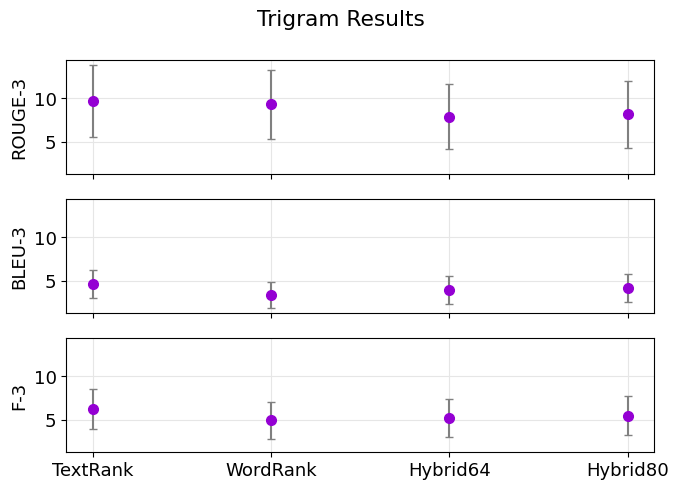

In [58]:
fig, axs = plt.subplots(3, sharex = True, figsize = (7, 5), sharey = True)

axs[0].errorbar(means.columns, means.iloc[2, :], sds.iloc[2, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 7, color = 'darkviolet');
axs[0].set(ylabel = 'ROUGE-3')

axs[1].errorbar(means.columns, means.iloc[5, :], sds.iloc[5, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 7, color = 'darkviolet');
axs[1].set(ylabel = 'BLEU-3')

axs[2].errorbar(means.columns, means.iloc[8, :], sds.iloc[8, :], 
                linestyle = 'None', marker = 'o', ecolor = 'grey', capsize = 3, ms = 7, color = 'darkviolet');
axs[2].set(ylabel = 'F-3')

for ax in axs:
    ax.grid(axis = 'x', color = '0.9')
    ax.grid(axis = 'y', color = '0.9')

fig.suptitle('Trigram Results')
fig.tight_layout()
fig.subplots_adjust(top = 0.88)

plt.show()